# Trabalho de Banco de Dados - A2
## Análise de dados sobre a antropização de biomas extra-amazônicos 
> #### Alunos:
>
> Amanda de Mendonça Perez
>
> Julia Queiroz Delgado 
>
> Kenner Azevedo 

In [25]:
#pip install -U -q pymongo

In [238]:
import datetime
import pprint

import pymongo
from pymongo import MongoClient

import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [222]:
#connect the database
client = MongoClient('localhost', 27017)
client.list_database_names()

['admin', 'bank', 'config', 'local']

In [223]:
db = client.bank

In [224]:
#ours collections
print(db.list_collection_names())
#we want insert data of states with format { "name" : Nome_estado , "valor" : val}

['data', 'states']


In [225]:
state_s = [{"name": "Acre","value":12},{"name": "Amazonas","value":13},{"name": "Amapá","value":   16},{"name": "Pará",
"value":   15},{"name": "Rondônia ","value":   11},{"name": "Roraima","value":   14},{"name": "Tocantins","value":   17}
,{"name": "Alagoas","value":   27},{"name": "Bahia","value":   29},{"name": "Ceará","value":   23},{"name": "Maranhão",
"value":   21},{"name": "Paraíba","value":   25},{"name": "Pernambuco","value":   26},{"name": "Piauí","value":   22},
{"name": "Rio Grande do Norte","value":   24},{"name": "Sergipe","value":   28},{"name": "Espírito Santo","value":   32}
,{"name": "Minas Gerais","value":   31},{"name": "Rio de Janeiro","value":   33},{"name": "São Paulo","value":   35}
,{"name": "Paraná","value":   41},{"name": "Rio Grande do Sul","value":   43},{"name": "Santa Catarina","value":   42}
,{"name": "Distrito Federal","value":   53},{"name": "Goiás","value":   52},{"name": "Mato Grosso","value":   51},
{"name": "Mato Grosso do Sul","value":   50}]

In [226]:
#insert of states
lista_of_ids =[]
for state in range(len(state_s)):
    if(db.states.find_one(state_s[state])): #verifica se o estado ja existe na nossa base de dados
        pass
    else:
        _id = db.states.insert_one(state_s[state]).inserted_id #vai ficar inserindo varias vezes
        index = {'id': _id, "value" : state_s[state]["value"]}
        lista_of_ids.append(index)
print(lista_of_ids)

[]


In [227]:
import json

def read_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

In [234]:
data = read_json('data_brazilian.json')

In [229]:
print(data.keys())

dict_keys(['type', 'features'])


In [235]:
#print(data['features'][50])
for i in range(len(data['features'])):
    if(db.data.find_one(data['features'][i])): #verifica se o estado ja existe na nossa base de dados
        pass
    else:
        _id = db.data.insert_one(data['features'][i]).inserted_id #vai ficar inserindo varias vezes

In [236]:
print(db.list_collection_names())
print(client.list_database_names())

['data', 'states']
['admin', 'bank', 'config', 'local']


In [237]:
#Testando o geopandas

data, states = db.data, db.states
dados = gpd.GeoDataFrame(list(data.find()))

dados_json = list(data.find())
print('Dados: \n', dados.head(),'\n \n--------------------- \n\nEstados:\n', estados.head())

Dados: 
                         _id     type  \
0  61a18d702ebb3fcebef396df  Feature   
1  61a18d702ebb3fcebef396e0  Feature   
2  61a18d702ebb3fcebef396e1  Feature   
3  61a18d702ebb3fcebef396e2  Feature   
4  61a18d702ebb3fcebef396e3  Feature   

                                          properties  \
0  {'id': '1100015', 'name': 'Alta Floresta D'Oes...   
1  {'id': '1100023', 'name': 'Ariquemes', 'descri...   
2  {'id': '1100031', 'name': 'Cabixi', 'descripti...   
3  {'id': '1100049', 'name': 'Cacoal', 'descripti...   
4  {'id': '1100056', 'name': 'Cerejeiras', 'descr...   

                                            geometry  
0  {'type': 'Polygon', 'coordinates': [[[-62.1820...  
1  {'type': 'Polygon', 'coordinates': [[[-62.5359...  
2  {'type': 'Polygon', 'coordinates': [[[-60.3993...  
3  {'type': 'Polygon', 'coordinates': [[[-61.0005...  
4  {'type': 'Polygon', 'coordinates': [[[-61.5004...   
 
--------------------- 

Estados:
                         _id       name  value


In [240]:
parsed_data = [[item['properties']['id'],
                item['properties']['name'],
                item['properties']['description'],
                Polygon(item['geometry']['coordinates'][0])] for item in dados_json]
dados = gpd.GeoDataFrame(data=parsed_data, columns=['id', 'name', 'description', 'geometry'])
print(dados.head())

        id                   name            description  \
0  1100015  Alta Floresta D'Oeste  Alta Floresta D'Oeste   
1  1100023              Ariquemes              Ariquemes   
2  1100031                 Cabixi                 Cabixi   
3  1100049                 Cacoal                 Cacoal   
4  1100056             Cerejeiras             Cerejeiras   

                                            geometry  
0  POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...  
1  POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...  
2  POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...  
3  POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...  
4  POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...  


In [241]:
dados['uf_code'] = dados['id'].map(str)
for i in range (0, dados['id'].size):
    dados.loc[i,'uf_code'] = int(dados['uf_code'].iloc[i][:2])
dados.head()

,id,name,description,geometry,uf_code
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...",11
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...",11
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...",11
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...",11
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...",11


In [283]:
def plot_map(cor, estado=None): 
    if estado == None:
        dados.plot(color=cor,  edgecolor=cor)
        plt.xticks(())
        plt.yticks(())
        plt.show()
    else:
        uf = estados[estados.name == estado]['value'].values[0]
        a = dados[dados.uf_code == uf].plot(color=cor, edgecolor=cor)
        plt.xticks(())
        plt.yticks(())
        plt.show()

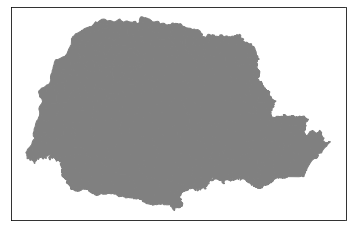

In [292]:
estado = "Paraná"
cor = "grey"
plot_map(cor, estado)

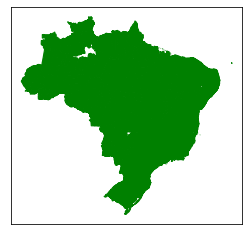

In [295]:
cor = 'green'
plot_map(cor)